# Machine learning

This week we will be learning about the basic concepts of machine learning. 



## What is machine learning?

* The goal of machine learning is to build **predictive models**

* These models **learn** from data, identify patterns, and make predictions **without being explicitly programmed**

* Contrasts with process-based models that rely on established scientific principles and mathematical equations to describe a system's behavior

* Machine learning is **part** of artificial intelligence, but not the only part

```{image} images/ml_schematic.jpg
:width: 600px
:align: center
```

## Example - the [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/index.html)

```{image} images/penguins.png
:width: 600px
:align: center
```
Artwork by @allison_horst

We will use the Penguin dataset to demonstrate some key concepts. This dataset contains attributes for 342 penguins collected from three islands in the Palmer Archipelago, Antarctica. 

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('data/penguins.csv')
print(df.shape)
df.head()

(342, 5)


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


```{image} images/culmen_depth.png
:width: 600px
:align: center
```
Artwork by @allison_horst

There are three different species of penguins in this dataset. Our goal is to develop a model that can predict the species of penguin from just the attributes. Then, when we receive more **unlabelled data** (i.e. attributes but no species), we can make a prediction about the species of penguin. 

In [2]:
df['Species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

One way to do this would be develop some decision rules. 

In [3]:
df.groupby('Species').mean()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


It looks like Adelie penguins have a smaller bill length and that Gentoo penguins have longer flippers and are heavier. 

* We could use our own judgement to define a threshold for separating the species based on their attributes. But this would be challenging to do when our datasets have more than a couple of attributes.

* An alternative approach is to develop a model to **learn the decision rules directly from the data** (i.e. machine learning).  

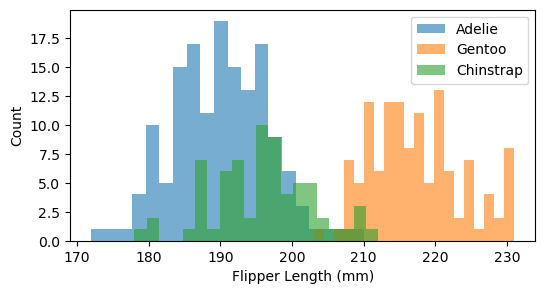

In [4]:
# Plot histogram of Flipper Length for each species
plt.figure(figsize=(6,3))
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.hist(subset['Flipper Length (mm)'], bins=20, alpha=0.6, label=species)

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")
plt.legend()
plt.show()

## Some vocabularly

* Machine learning starts with a **labelled dataset**

* A **label** (or target variable) is the thing we're attempting to predict (e.g. penguin species)

* A **feature** (or predictor variable) is an individual measurable property of the dataset (e.g. flipper length)

* A **sample** are different individuals or observations

In [5]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


## Supervised learning 

* The goal is to **train** an algorithm using features in **labelled** dataset to predict the label of new data that is **unlabelled**

```{note}
That this **label** could be **categorical** (i.e. classification) or **continuous** (i.e. regression)
```

* However, it's tough to collect high-quality labelled data (time-consuming, expensive), sometimes we don't know what the labels should be.

```{image} images/captcha.jpeg
:width: 300px
:align: center
```

## Unsupervised learning

* The goal is to extract some structure from our **unlabelled dataset** that can be used to generalize.

* For example, how many different species are contained in our penguin dataset? 

* Not commonly used in geospatial data science but has a wide variety of applications (e.g. next-word (next-token) prediction)

## Classification

* "Split things into **groups** based on their **features**"

* Examples include:
    * Land cover
    * Flood risk zones
    * Sentiment analysis

```{image} images/classification.jpg
:width: 300px
:align: center
```

## Regression

* "Draw a **line** through these dots"

* Used for predicting continuous variables:
    * River discharge
    * House prices
    * Weather forecasting  

```{image} images/regression.jpeg
:width: 300px
:align: center
```

## Clustering

* "Divide data into groups but machine chooses the best way"

* Common usages include:
    * Image compression
    * Labeling training data (i.e. for supervised learning)
    * Detecting abnormal behavior
    
```{image} images/clustering.jpeg
:width: 300px
:align: center
```

## Exploring our dataset

The first step when developing any machine learning model is to gain some intuition about our dataset. `Pandas` contains some ueful functions for doing this. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              342 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    int64  
 4   Body Mass (g)        342 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 13.5+ KB


In [7]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


We can also investigate the **separability** of penguin species using scatterplots

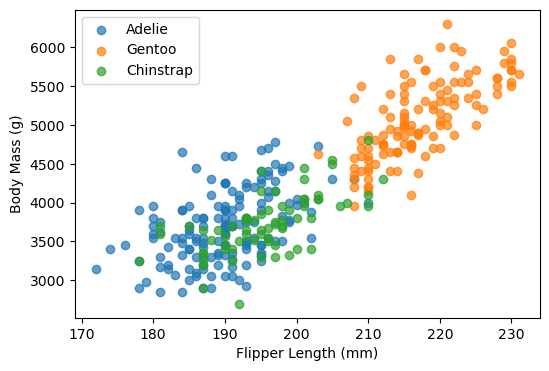

In [8]:
# Scatter plot categorized by Species
plt.figure(figsize=(6,4))

species_list = df['Species'].unique()
for species in species_list:
    subset = df[df['Species'] == species]
    plt.scatter(
        subset['Flipper Length (mm)'], 
        subset['Body Mass (g)'], 
        alpha=0.7, 
        label=species
    )
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend()

Finally, we may also want to check the number of observations in each category. 

In [9]:
df["Species"].value_counts()

Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

We find that there are less Chinstrap penguins than other types in this dataset. This is example **class imbalance** which we should be aware of when developing our model. For example, our model could have a high overall accuracy even if it is not be very good at identifying Chinstraps. This may mask the true performance of our model, especially for specific questions about Chinstrap penguins. 

## Feature scaling

* Machine Learning algorithms sometimes don't perform well when the input numerical attributes have very **different scales**.

* Therefore we often **scale** (or normalize) our features before training the model (e.g. min-max scaling or standardization).

```{tip}
Models that rely on the **distance** between a pair of samples (e.g. k-nearest neighbors), should be trained on normalized features to make each feature contribute approximately equally to the distance computations.

Many models such as logistic regression use a numerical solver (based on gradient descent) to find their optimal parameters. This solver converges faster when the features are scaled.
```

* **Min-max method** scales values so that they end up ranging from 0 to 1

* **Standardization** scales values so that the they have mean of 0 and unit variance.

```{image} images/scaling.png
:width: 800px
:align: center
```

In [10]:
# Import library
from sklearn.preprocessing import StandardScaler

# Define feature list
feature_list =  ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

# Define features and labels 
X = df[feature_list]
y = df['Species']

In [11]:
# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_list)
df_scaled

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947
338,-0.077396,0.481175,0.077258,-1.001215
339,1.041543,0.531887,-0.563715,-0.532923
340,1.261662,0.937586,0.647013,-0.127069


In [12]:
df_scaled.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,1.662088e-16,4.155221e-16,-8.310441e-16,8.310441e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


## Split data in training and testing subsets

If we want to properly evaluate our machine learning model, we should not use **all** the data for training. Instead, we should train the model on a **subset of the data**, retaining another subset (that the model has not "seen") to **evaluate** the model. 

In [13]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

Our test dataset is a random sample containing 69 individuals, 11 of which are Chinstrap penguins.

In [14]:
y_test.value_counts()

Species
Adelie       35
Gentoo       23
Chinstrap    11
Name: count, dtype: int64

## Fitting our first model

Now we are ready to build our first model. There are usually three main steps here: `fit`, `predict`, `score`. We will first experiment with a very simple supervised algorithm that classifies our data using **K-nearest neighbors**. 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Define model
model = KNeighborsClassifier()

The `fit` method is called to train the model from the input (features) and target data.

In [16]:
# Fit model to data
model.fit(X_train, y_train)

KNeighborsClassifier()

In scikit-learn an object that has a `fit` method is called an **estimator**. We can use the estimator to make predictions on our data.

In [17]:
# Predict test labels
predictions = model.predict(X_test)

We then use the `score` method to evaluate the performance of our model.

In [18]:
# Score
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.986


To compute the score, the predictor first computes the predictions (using the predict method) and then uses a scoring function to compare the true value vs. the predictions.

```{note}
If we compare with the accuracy obtained by wrongly evaluating the model on the **training data**, we find a higher accuracy compared to the score obtained on the held-out test data.
```

In [19]:
accuracy = model.score(X_train, y_train)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.993


## Confusion matrix

Overall accuracy is a rather crude metric for evaluating the performance of our model. Each observation in the test dataset is treated eqaully, So, as we mentioned earlier, the model could 100% accurate at identifying common penguin species (e.g. Adelie and Gentoo) but be bad at identifying rarer penguin species (e.g. Chinstrap) and still have a high overall accuracy.

The standard way of evaluating a multi-class prediction model is to use a confusion matrix. 

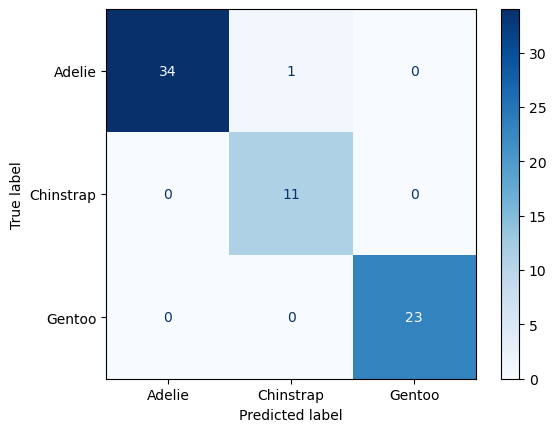

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Luckily we didn't need to be worried about class imbalances. It looks like all the Chinstrap penguins in the test dataset were labelled accurately. However, our model mislabelled one Adelie penguin as a Chinstrap. 

## Cross-validation

Since our dataset has 342 individuals (i.e. not that many), we might as well use them all to fit our model. But, if we do this, we won't be able to effectively evaluate our model. To overcome this, we can use **cross-validation** which involves systematically repeating the train-test split such that the training and testing datasets are different for each evaluation. 

```{image} images/kfold.png
:width: 800px
:align: center
```

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
test_scores = cross_val_score(model, df_scaled, y, cv=cv)

print(f"The mean test accuracy using cross-validation is {np.mean(test_scores):.3f}")

The mean test accuracy using cross-validation is 0.985


```{note}
When we set `n_splits` to **5**, the dataset is split into 5 roughly equal parts (“folds”). In each round, 4 folds are used for training and 1 fold is used for testing (i.e. 80/20 split). If we set `n_splits` to 10, then the dataset would be split into 10 folds, meaning that 9 would be used for training and 1 for testin (i.e. 90/10 split). The split is therefore dependent on the number of folds. `KFold` may not be appropriate for small datasets (since `n_splits` cannot be larger than number of samples). 
```

An alternative approach is called the `ShuffleSplit` which, as the name suggests, shuffles the dataset randomly and then splits it into a training set and a test set according to the sizes that we choose. This approach allows us to define specific train-test splits. 

```{image} images/shufflesplit.png
:width: 800px
:align: center
```

In [22]:
from sklearn.model_selection import ShuffleSplit

# Define cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation
test_scores = cross_val_score(model, df_scaled, y, cv=cv)

print(f"The mean test accuracy using cross-validation is {np.mean(test_scores):.3f}")

The mean test accuracy using cross-validation is 0.991


## Other models

Now that we have tested one model on our dataset, it is simple to test other models.

The test accuracy using a DecisionTreeClassifier is 0.957


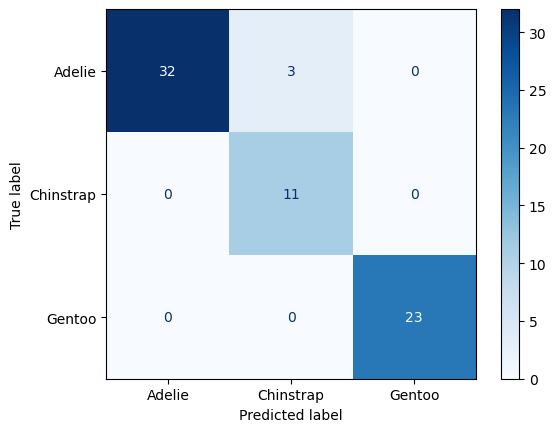

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier()

# Fit model
model.fit(X_train, y_train)

# Predict test labels
predictions = model.predict(X_test)

# Score
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

A popular **ensemble algorithm** that fits a number of **decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The test accuracy using a RandomForestClassifier is 0.971


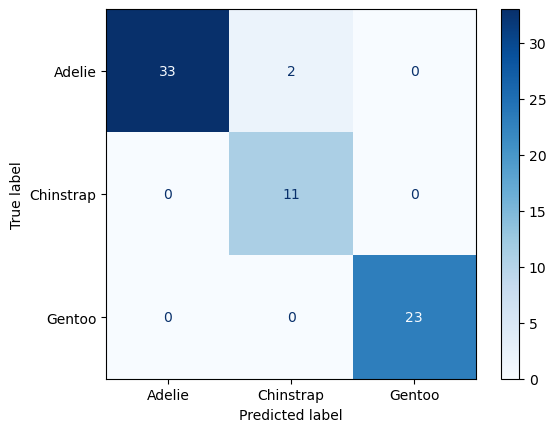

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier(n_estimators=30)

# Fit model
model.fit(X_train, y_train)

# Predict test labels
predictions = model.predict(X_test)

# Score
accuracy = model.score(X_test, y_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Parameters

All three models that we have used so far can be **customized** using parameters. We can apply the `get_params()` method to our estimators to see what we can adjust. 

For our `KNeighborsClassifier`, the most important parameter is `n_neighbors` which is the number of neighboring observations that the algorithm looks at when making a prediction.

In [25]:
# Define model
model = KNeighborsClassifier()

# Print all hyperparameters
print(model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


For our `DecisionTreeClassifier`, there are more parameters we can adjust but the main one is the `max_depth` which limits the number of levels (or layers of splits) in a decision tree. 

In [26]:
# Define model
model = DecisionTreeClassifier()

# Print all hyperparameters
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


If we set `max_depth` to be small (e.g. <5) then the tree will be shallow and model is only likely to capture broad, simple patterns. It may therefore be prone to **underfitting**. 

In contrast, if we do not set `max_depth`, it defaults to `None` meaning that there is not limit on the height of the tree. On the one head, this may be useful because the tree is more likely to capture more subtle patterns. However, if the tree becomes too deep, then it may begin to split the data until every sample is perfectly separated. If the dataset contains **noise** (which is likely), then the tree will be fitted not only to the true signal but also to **noise** in the data. We call this **overfitting** and it can reduce the overall accuracy of our model.

## Overfitting and underfitting

So cane we pick a `max_depth` that prevents our model underfitting or overfitting our data? Yes, we can but we have approached the limit of our penguin dataset, so we will now use a new dataset that contains the median value of houses in an area in California. The features collected are based on some statistical averages for each region and geographic information. The goal is therefore to **predict a continuous variable** i.e. **regression**.

First let's import the data and define a decision tree regressor with no limit on `max_depth`.

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Load data
housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [28]:
# Define estimator
regressor = DecisionTreeRegressor(max_depth=None)

# Split
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

# Fit
regressor.fit(data_train, target_train)

# Predict
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"The testing error of our model is {score:.2f} k$")

The testing error of our model is 46.60 k$


To investigate under- and over-fitting, it is also useful to track the **training error**. This metric is defined as the accuracy of our model when applied to the target variable (i.e house price) of the **training dataset** (as opposed to the testing dataset).

In [29]:
# Fit
regressor.fit(data_train, target_train)

# Predict
target_predicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"The training error of our model is {score:.2f} k$")
print("Tree depth:", regressor.tree_.max_depth)
print("Number of leaves:", regressor.tree_.n_leaves)

The training error of our model is 0.00 k$
Tree depth: 36
Number of leaves: 14839


We get perfect prediction with **zero training error**. This is because our decision tree grew so large that it was able to fully memorize our dataset. This should set off some alarm bells because it means our model is likely capturing **noise**. 

We can use **validation curves** to pick a `max_depth` that is more appropriate for our dataset. 

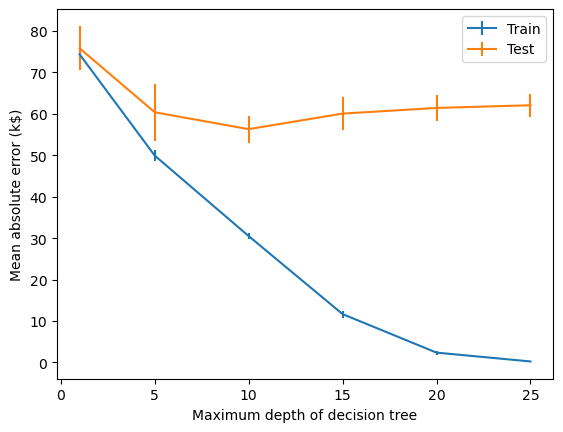

In [30]:
from sklearn.model_selection import ValidationCurveDisplay

max_depth = np.array([1, 5, 10, 15, 20, 25])
disp = ValidationCurveDisplay.from_estimator(
    regressor, data, target, param_name="max_depth", param_range=max_depth,
    scoring="neg_mean_absolute_error", negate_score=True, std_display_style="errorbar", n_jobs=2)
_ = disp.ax_.set(
    xlabel="Maximum depth of decision tree",
    ylabel="Mean absolute error (k$)",)

The plot shows that:

* For `max_depth < 10`, the decision tree underfits the data. The training error and therefore the testing error are both high because the model is too constrained and cannot capture much of the variability of in house prices.

* The decision tree generalizes the best at `max_depth = 10`. It is flexible enough to capture a fraction of the variability of the target that generalizes, while not memorizing all of the noise in the target.

* The decision tree overfits for `max_depth > 10`. The training error becomes very small, while the testing error actually increases. At these `max_depths`, the model is memorizing the dataset, including the noise, which is harming its ability to generalize to the test data.

We have just performed **regularization**, an important machine learning concept that refers to any approach that is used to **constrain model complexity to avoid overfitting**. 

Another example of under- or over-fitting would be a polynomial function that had too few or too many degrees.

```{image} images/overunder.png
:width: 800px
:align: center
```

## Noise

Our house price dataset likely contains a lot of noise. The price of the house could depend time of year or the circumstances of the buyer or seller. These factors are not considered in the features. Since these missing feature are randomly varying from one sample to the next, it appears as if the target variable was changing because of the impact of a random perturbation or noise, even if there were no errors made during the data collection process.

The same is true for environmental data. We may not be able to measure something that impacts the target variable. It is also possible that there are instrumental errors such as poorly calibrated sensors, limitations in precision, or interference that impact the accuracy of our data. Those unpredictable data acquisition errors can happen either on the input features or in the target variable (in which case we often name this **label noise**).

While it is challenging to understand which kind of “noise” is dominating, there are many strategies to to make our predictive models robust to noise. These be applied across the entire development cycle:

* **Data augmentation** (e.g. increase the number of labeled samples in our training dataset)

* **Regularization** (e.g. enforce limits or penalize models that become too complex)

* **Ensemble models** (e.g. combine predictions from multiple different models to average out errors from individual models)

* **Cross-validation** (e.g. assess ability of model to perform consistently across different data subsets)

And there are probably many other strategies...

## Learning curves

Besides under- and over-fitting, it is also important to understand how the accuracy of our model is influenced by the **number of samples available**. To investigate this source of error, we can synthetically reduce the number of samples used to train the predictive model and check the training and testing errors using a **learning curve**. 

```{note}
A learning curve could also be used to investigate how the testing error changes with number of training cycles or epochs.
```

Let’s compute the learning curve for a decision tree and vary the proportion of the training set from 10% to 100%.

In [31]:
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

We will use a `ShuffleSplit` cross-validation to assess our predictive model.

In [32]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)

Now, we are all set to carry out the experiment.

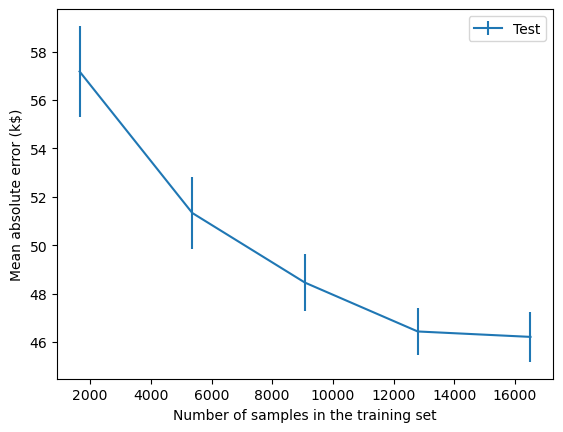

In [33]:
from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    regressor, data, target, train_sizes=train_sizes, cv=cv,
    score_type="test",
    scoring="neg_mean_absolute_error",
    negate_score=True,
    score_name="Mean absolute error (k$)",
    std_display_style="errorbar",
    n_jobs=2,
)

We find that the testing error becomes lower as more samples are added to the training set. It looks as though the testing error is starting to plateau a bit but it is also still going down. We can therefore conclude that more samples would probably improve our predicitve model. This kind of analysis can be useful for informing decision-making. If it is possible to collect more samples, then we should probably do that. However, if the testing error did plateau, then collecting more samples would not be useful and we may reserve our efforts for other things e.g. reducing or handling noise in dataset, developing more sophisticated models etc.

## Further reading

More information about the Palmer Penguin dataset can be found [here](https://allisonhorst.github.io/palmerpenguins/index.html)